<a href="https://colab.research.google.com/github/Abinash-bit/DocQuestAI/blob/master/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#99,228

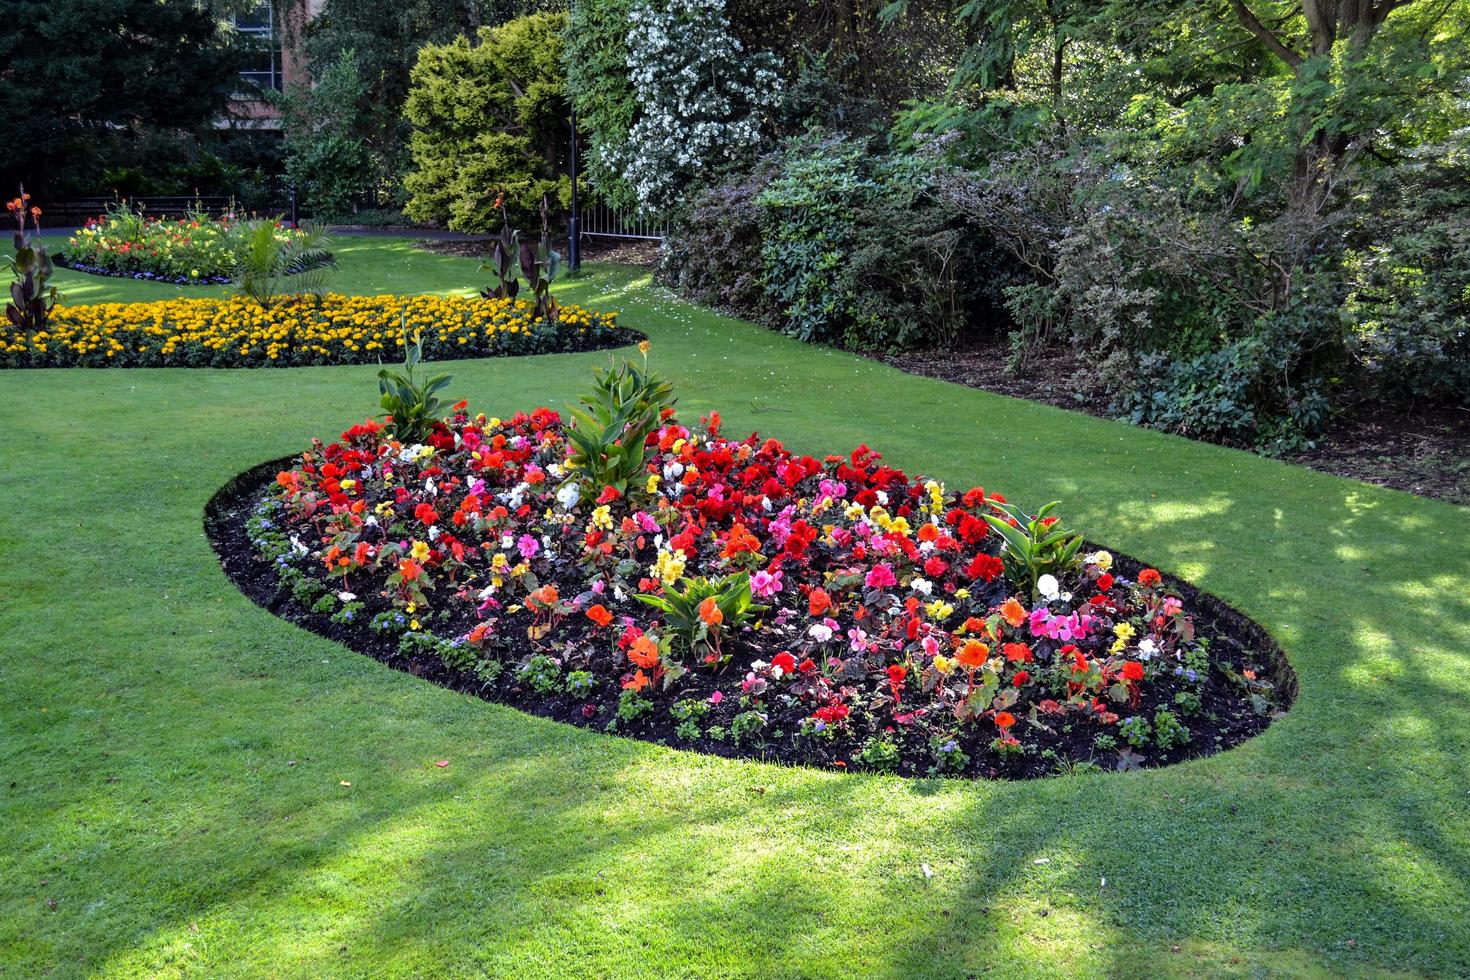

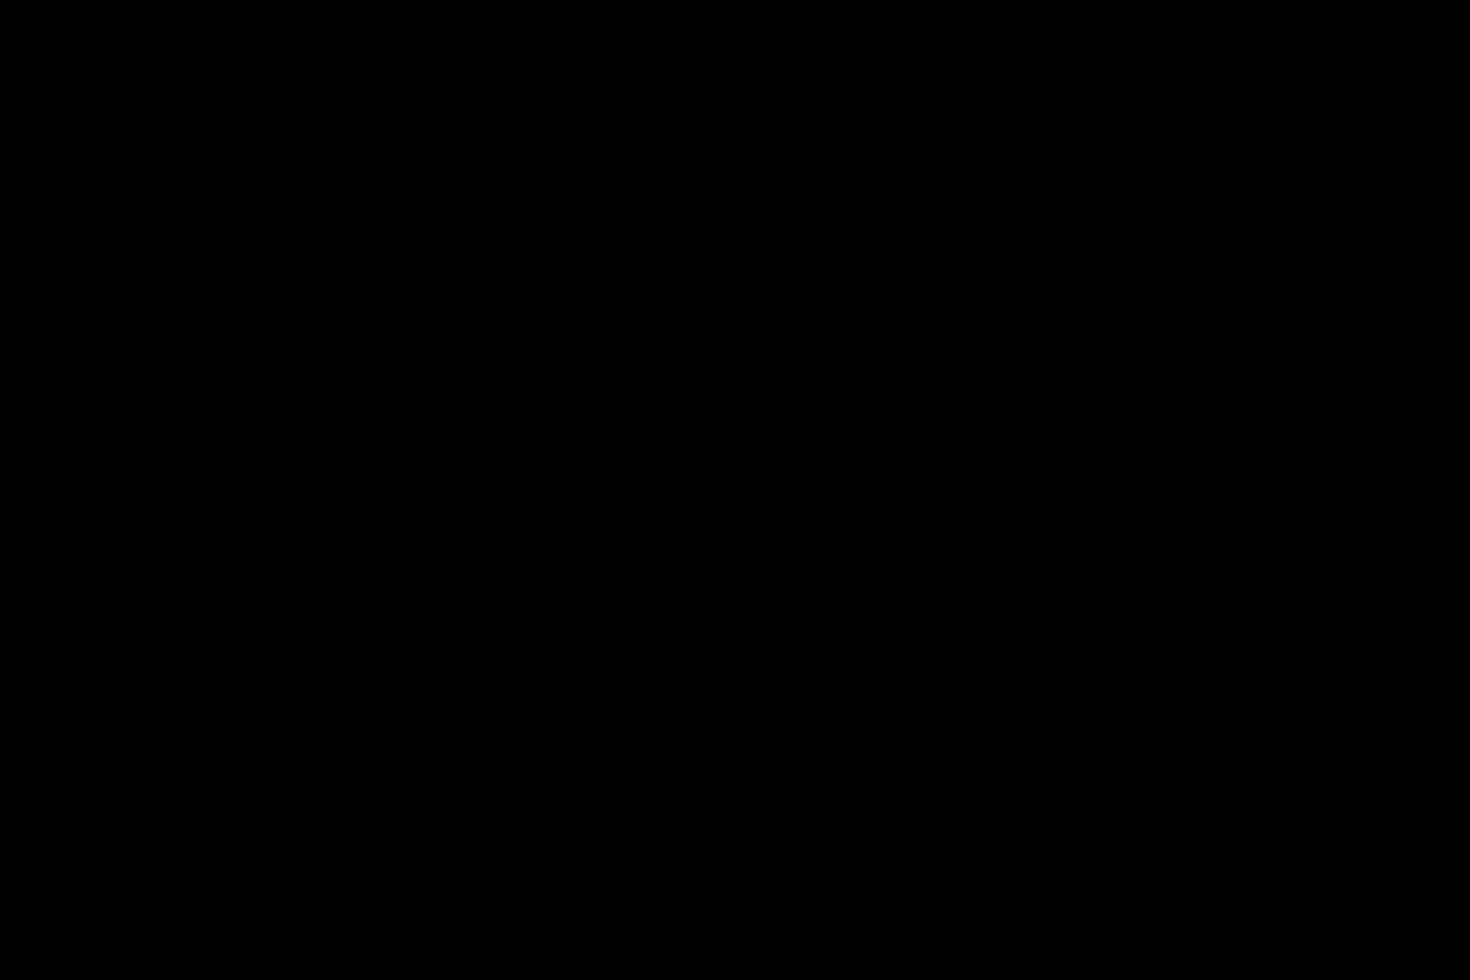

True

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# base image path
image_path = '/content/base.jpg'
base_image = cv2.imread(image_path)

base_mask = np.zeros_like(base_image)
cv2_imshow(base_image)
cv2_imshow(base_mask)

mask_save_path = '/content/base_mask.jpg'
cv2.imwrite(mask_save_path, base_mask)


In [8]:
import cv2
import numpy as np

# Path to the reference mask image
mask_path = '/content/ref_mask3.jpg'
ref_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


_, binary_mask = cv2.threshold(ref_mask, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box
x, y, w, h = cv2.boundingRect(contours[0])
bounding_box_area = w * h

total_pixels = ref_mask.shape[0] * ref_mask.shape[1]
bounding_box_ratio = bounding_box_area / total_pixels

print("Ratio of bounding box area to total image area:", bounding_box_ratio)

# Save the bounding box as a separate image
bounding_box_image = ref_mask[y:y+h, x:x+w]
cv2.imwrite("bounding_box_image.jpg", bounding_box_image)
print("Bounding box image saved successfully.")


Ratio of bounding box area to total image area: 4.749962000303997e-06
Bounding box image saved successfully.


In [9]:
import cv2
import numpy as np


mask_path = '/content/ref_mask3.jpg'
ref_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if ref_mask is None:
    print("Error: Unable to read the reference mask.")
else:
    _, binary_mask = cv2.threshold(ref_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a filled contour mask
    filled_mask = np.zeros_like(binary_mask)
    cv2.fillPoly(filled_mask, contours, color=255)

    x, y, w, h = cv2.boundingRect(filled_mask)
    width_scale_ratio = (w / ref_mask.shape[1]) * 0.5
    height_scale_ratio = (h / ref_mask.shape[0]) * 0.5

    print("Width scale ratio:", width_scale_ratio)
    print("Height scale ratio:", height_scale_ratio)

    # Save the bounding box as a separate image
    bounding_box_image = ref_mask[y:y+h, x:x+w]
    cv2.imwrite("bounding_box_image.jpg", bounding_box_image)
    print("Bounding box image saved successfully.")


Width scale ratio: 0.44281045751633985
Height scale ratio: 0.34593023255813954
Bounding box image saved successfully.


In [10]:
import cv2

# Path to the BASE mask image
mask_path = '/content/base_mask.jpg'
base_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
if base_mask is not None:
    height, width = base_mask.shape
    print("Height:", height)
    print("Width:", width)
else:
    print("Failed to read the image at the specified path.")


Height: 980
Width: 1470


In [11]:
import cv2

def resize_and_save(image_path, output_path, new_height, new_width):
    image = cv2.imread(image_path)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))
    cv2.imwrite(output_path, resized_image)

image_path = '/content/bounding_box_image.jpg'
new_height = int(height * height_scale_ratio)
new_width = int(width * width_scale_ratio)
output_path = '/content/new_bounding_box_image.jpg'

resize_and_save(image_path, output_path, new_height, new_width)


In [12]:
import cv2
import numpy as np

def overlay_images(base_image_path, overlay_image_path, output_path, center_x, center_y):


    base_image = cv2.imread(base_image_path)
    overlay_image = cv2.imread(overlay_image_path)

    overlay_x = center_x - overlay_image.shape[1] // 2
    overlay_y = center_y - overlay_image.shape[0] // 2

    # Ensure that the overlay image fits within the base image
    overlay_x = max(overlay_x, 0)
    overlay_y = max(overlay_y, 0)

    # Calculate the region for overlaying
    roi = base_image[overlay_y:overlay_y+overlay_image.shape[0], overlay_x:overlay_x+overlay_image.shape[1]]

    # Create a mask for the overlay image
    overlay_mask = cv2.cvtColor(overlay_image, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(overlay_mask, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # Overlay the image onto the base image
    base_image_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    overlay_fg = cv2.bitwise_and(overlay_image, overlay_image, mask=mask)
    combined = cv2.add(base_image_bg, overlay_fg)


    base_image[overlay_y:overlay_y+overlay_image.shape[0], overlay_x:overlay_x+overlay_image.shape[1]] = combined

    #  output image
    cv2.imwrite(output_path, base_image)

base_image_path = '/content/base_mask.jpg'
overlay_image_path = '/content/new_bounding_box_image.jpg'
output_path = '/content/overlay_output.jpg'
center_x =99
center_y = 228

overlay_images(base_image_path, overlay_image_path, output_path, center_x, center_y)
